In [1]:
pip install ortools

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
CityListExcel = pd.read_excel('Dataset EAS.xlsx')
CityListExcel.head(10)

,x,y
0,37,52
1,49,49
2,52,64
3,20,26
4,40,30
5,21,47
6,17,63
7,31,62
8,52,33
9,51,21


In [3]:
cityList = []


for i in range(0,len(CityListExcel)):
    x=CityListExcel.loc[i][0]
    y=CityListExcel.loc[i][1]
    cityList.append((x,y))

In [4]:
"""Simple travelling salesman problem on a circuit board."""

import math
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


def create_data_model():
    """Stores the data for the problem."""
    data = {}
    # Locations in block units
    data['locations'] = cityList  # yapf: disable
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data


def compute_euclidean_distance_matrix(locations):
    """Creates callback to return distance between points."""
    distances = {}
    for from_counter, from_node in enumerate(locations):
        distances[from_counter] = {}
        for to_counter, to_node in enumerate(locations):
            if from_counter == to_counter:
                distances[from_counter][to_counter] = 0
            else:
                # Euclidean distance
                distances[from_counter][to_counter] = (int(
                    math.hypot((from_node[0] - to_node[0]),
                               (from_node[1] - to_node[1]))))
    return distances


def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print('Objective: {}'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Objective: {}m\n'.format(route_distance)
    


def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['locations']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)

    distance_matrix = compute_euclidean_distance_matrix(data['locations'])

    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return distance_matrix[from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(manager, routing, solution)


if __name__ == '__main__':
    main()



Objective: 441
Route:
 0 -> 31 -> 10 -> 37 -> 8 -> 48 -> 4 -> 11 -> 45 -> 50 -> 26 -> 5 -> 13 -> 24 -> 12 -> 40 -> 39 -> 18 -> 41 -> 3 -> 17 -> 46 -> 16 -> 36 -> 43 -> 14 -> 44 -> 32 -> 38 -> 9 -> 29 -> 33 -> 49 -> 15 -> 20 -> 28 -> 1 -> 19 -> 34 -> 35 -> 2 -> 27 -> 30 -> 25 -> 6 -> 42 -> 23 -> 22 -> 47 -> 7 -> 21 -> 0



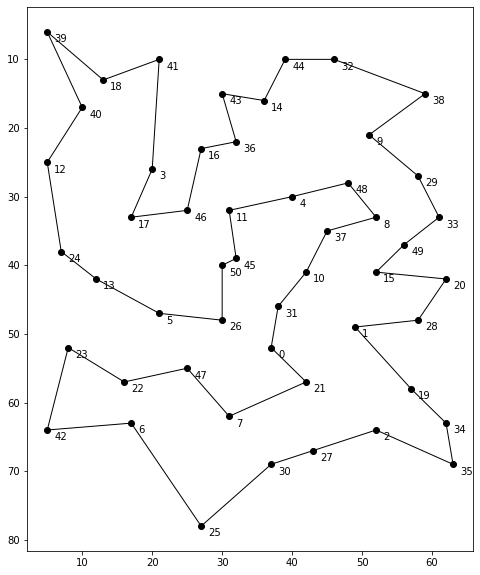

In [10]:
urutan = [0, 31, 10, 37, 8, 48, 4, 11, 45, 50, 26, 5, 13, 24, 12, 40, 39, 18, 41, 3, 17, 46, 16, 36, 43, 14, 44, 32,
 38, 9, 29, 33, 49, 15, 20, 28, 1, 19, 34, 35, 2, 27, 30, 25, 6, 42, 23, 22, 47, 7, 21, 0]

x_axis2=[]
y_axis2=[]
for i in urutan:
    x_axis2.append(cityList[i][0])
    y_axis2.append(cityList[i][1])

x_axis=[]
y_axis=[]
for i in cityList:
    x_axis.append(i[0])
    y_axis.append(i[1])

df = pd.DataFrame(cityList)

plt.figure(figsize=(8,10))
plt.plot(x_axis,y_axis, 'ro',color='black')
for i in range(df.shape[0]):
    plt.text(df.iloc[i,0]+1, df.iloc[i,1]+1.5, str(i))


plt.plot(x_axis2, y_axis2, color='black', linewidth=1)
plt.gca().invert_yaxis()
plt.show()